# **Advertising Sales Prediction Project**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


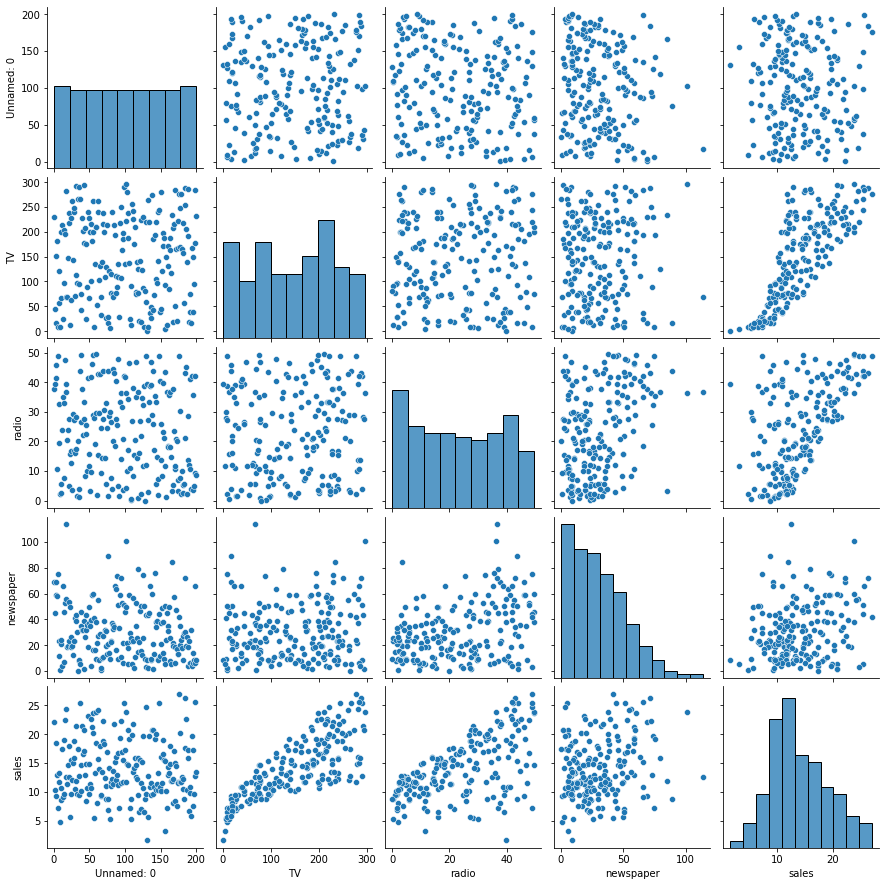

In [9]:
# Graph
sns.pairplot(df)

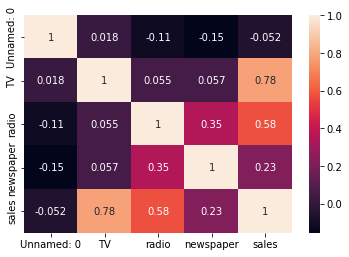

In [10]:
# Corelations
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


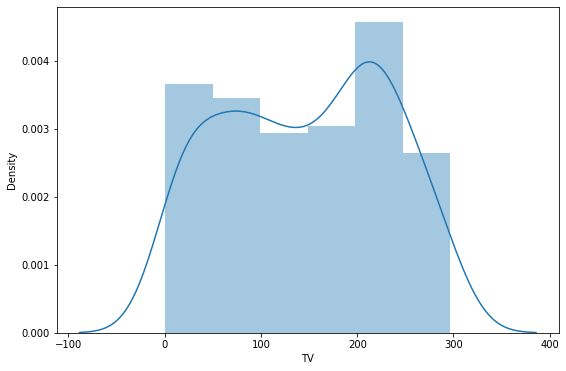

In [11]:
#Data distribution of each variable
plt.figure(figsize=(9,6))
sns.distplot(df['TV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


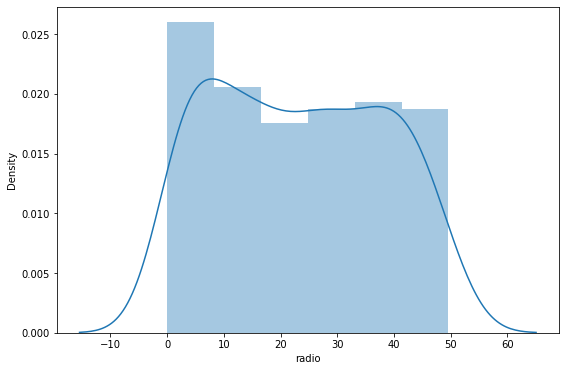

In [12]:
plt.figure(figsize=(9,6))
sns.distplot(df['radio'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


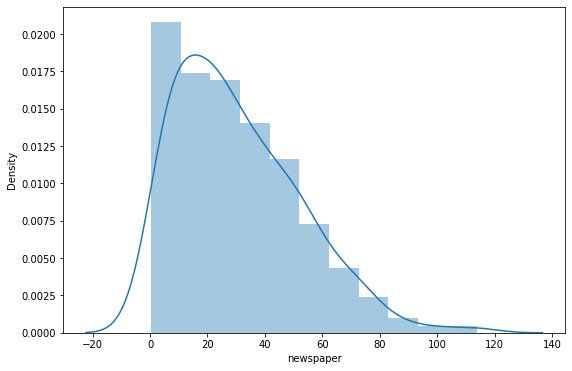

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(df['newspaper'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


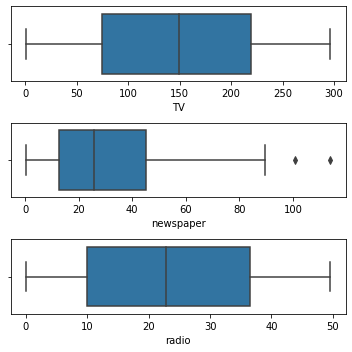

In [14]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

There are no considarable outliers present in data.

In [15]:
# Dividing data in train-test
X = df[['TV','radio','newspaper']].values
y = df['sales'].values

In [16]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
# Define model
linereg = LinearRegression()

In [19]:
#Fitting the model
linereg.fit(X_train,y_train)

LinearRegression()

In [20]:
#coefficients of model
linereg.coef_

array([0.04416235, 0.19900368, 0.00116268])

In [21]:
# Intercept
linereg.intercept_

2.8925700511511483

In [22]:
# Predicting 
y_predict = linereg.predict(X_test)

In [23]:
# Prediction
y_predict

array([10.0494569 ,  7.43052335,  6.97152143, 24.16378667, 12.00215643,
        6.54334645, 13.09526331, 14.95879164, 11.00528358, 16.27234553,
       22.99324688,  9.12188347, 10.33545333, 15.39628185, 11.60589932,
       12.11484332, 18.60251172, 10.81414474, 16.07541355, 17.22753644,
       24.2342995 ,  9.47711838, 15.13960412, 12.41064749,  5.67814427,
       15.22889947, 12.21635459, 20.94370559, 13.28068231,  9.16578351,
       13.30285718, 21.5770033 , 18.098111  , 21.15572322,  6.69734039,
        6.15355714,  7.96280151, 13.09426248, 14.81032968,  6.22020075,
       12.2799744 ,  9.1817324 , 15.04882696, 16.26091437, 17.16859664,
       13.32831849,  3.69143664, 12.43931798, 15.87909695,  8.68626862])

In [24]:
# Model Evaluation
print("Mean Abs Error :",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Sq Error  :",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Sq Error :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("r2 value   :",metrics.r2_score(y_test,y_predict))

Mean Abs Error : 1.3000320919235455
Mean Sq Error  : 4.012497522917099
Root Mean Sq Error : 2.0031219440955406
r2 value   : 0.8576396745320893
